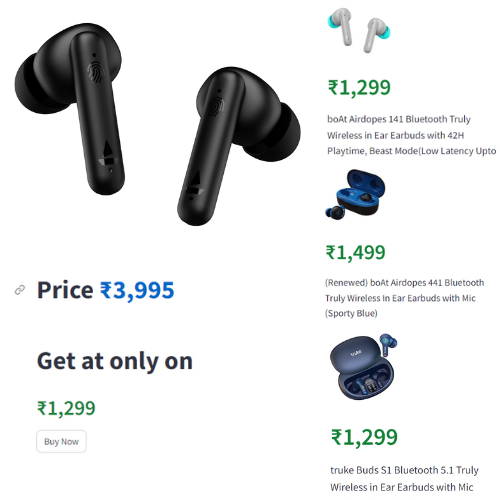

In [1]:
import pandas as pd
import numpy as np
import pickle
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import sys


 <center>  <h1 class="alert alert-block alert-info" style='color:black'>  Importing Dataset </h1>


In [2]:
electronics = pd.read_csv('/kaggle/input/amazon-products-dataset/All Electronics.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
electronics['name'][9579]

'Ambrane 18W BoostedSpeed™ Charger with USB Port & Quick Charge, Made in India, Multi-Layer Protection, iPhone & Android Co...'


 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Checking  for duplicates</h1>


In [4]:
electronics.duplicated().sum()

0


 <center>  <h1 class="alert alert-block alert-info" style='color:black'> Keywords Extraction</h1>


In [5]:
electronics ['#keywords'] =  electronics['name'].str.lower()

In [6]:
electronics['#keywords']

0                                                                                redmi 10 power (power black, 8gb ram, 128gb storage)
1                                                                       oneplus nord ce 2 lite 5g (blue tide, 6gb ram, 128gb storage)
2       oneplus bullets z2 bluetooth wireless in ear earphones with mic, bombastic bass - 12.4 mm drivers, 10 mins charge - 20 hrs...
3       samsung galaxy m33 5g (mystique green, 6gb, 128gb storage) | 6000mah battery | upto 12gb ram with ram plus | travel adapte...
4                                                                      oneplus nord ce 2 lite 5g (black dusk, 6gb ram, 128gb storage)
                                                                    ...                                                              
9595    palay® bts backpack for boys kpop bts bangtan school backback for student with cable vent, backpack travel bag backpack la...
9596    moca ipad air 5th generation case 2022 / ipad air 4th 

In [7]:
print(electronics['main_category'].value_counts())
print('=='*15)
print(electronics['sub_category'].value_counts())

main_category
tv, audio & cameras    9600
Name: count, dtype: int64
sub_category
All Electronics    9600
Name: count, dtype: int64


In [8]:
electronics.drop(['main_category','sub_category'],axis=1,inplace=True)

**Droping these columns as we know we only have Electronics product in our dataset.**


 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Keywords Text Preprocessing  </h1>


In [9]:
electronics['#keywords'] = electronics['#keywords'].str.replace('''[^\w\d\s]''','',regex=True)

In [10]:
electronics['#keywords']

0                                                                               redmi 10 power power black 8gb ram 128gb storage
1                                                                      oneplus nord ce 2 lite 5g blue tide 6gb ram 128gb storage
2          oneplus bullets z2 bluetooth wireless in ear earphones with mic bombastic bass  124 mm drivers 10 mins charge  20 hrs
3            samsung galaxy m33 5g mystique green 6gb 128gb storage  6000mah battery  upto 12gb ram with ram plus  travel adapte
4                                                                     oneplus nord ce 2 lite 5g black dusk 6gb ram 128gb storage
                                                                  ...                                                           
9595    palay bts backpack for boys kpop bts bangtan school backback for student with cable vent backpack travel bag backpack la
9596     moca ipad air 5th generation case 2022  ipad air 4th 2020 case 109 inch slim stand hard 


 <center>  <h1 class="alert alert-block alert-info" style='color:black'> Stemming the Keywords </h1>



In [11]:
stemmer = PorterStemmer()

In [12]:
def stemming(text):
    words = []
    for word in text.split(' '):
        words.append(stemmer.stem(word))
    return ' '.join(words)
        

In [13]:
import re

In [14]:
text = "Dancer dancing in the dance floor. while dancing he fell on the floor and dancer's dance is stopped"
stemming(text)

"dancer danc in the danc floor. while danc he fell on the floor and dancer' danc is stop"

**After Stemming:**
- **dancer** - dancer
- **dancing** - danc
- **dance** - danc
- **stopped** - stop

In [15]:
electronics['#keywords'] = electronics['#keywords'].apply(stemming)

In [16]:
electronics['#keywords']

0                                                                            redmi 10 power power black 8gb ram 128gb storag
1                                                                    oneplu nord ce 2 lite 5g blue tide 6gb ram 128gb storag
2                oneplu bullet z2 bluetooth wireless in ear earphon with mic bombast bass  124 mm driver 10 min charg  20 hr
3            samsung galaxi m33 5g mystiqu green 6gb 128gb storag  6000mah batteri  upto 12gb ram with ram plu  travel adapt
4                                                                   oneplu nord ce 2 lite 5g black dusk 6gb ram 128gb storag
                                                                ...                                                         
9595    palay bt backpack for boy kpop bt bangtan school backback for student with cabl vent backpack travel bag backpack la
9596         moca ipad air 5th gener case 2022  ipad air 4th 2020 case 109 inch slim stand hard back shell protect smart cov



 <center>  <h1 class="alert alert-block alert-info" style='color:black'> Vectorization </h1>



In [17]:
CV = CountVectorizer(max_features=5000,stop_words='english',dtype=np.int8)

In [18]:
CV.fit(electronics['#keywords'])

CountVectorizer(dtype=<class 'numpy.int8'>, max_features=5000,
                stop_words='english')

In [19]:
vectors = CV.transform(electronics['#keywords']).toarray()
print(vectors.shape)

(9600, 5000)


**We have utilized a count vectorizer to extract the top 5000 frequently occurring words from a series of text. Additionally, we removed stop words of english.
This will help us alot to save memory and reduce computational cost after deployment.**



 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Similarity [Cosine]</h1>



In [20]:
similarity  = cosine_similarity(vectors)

In [21]:
# releasing memory
del(vectors) 
electronics.drop('#keywords',axis=1,inplace=True)

In [22]:
print('Shape :',similarity.shape)
similarity[0]

Shape : (9600, 9600)


array([1.        , 0.28603878, 0.07106691, ..., 0.        , 0.        ,
       0.08703883])

**Here, we generate a similarity matrix of size 9600 x 9600. Each row (Ri) in the matrix represents the similarity between the product in row Ri and all other 9600 products. In essence, the matrix encapsulates the pairwise similarities across the entire set of 9600 products.**



 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Recommendation Algorithm [Initial] </h1>



In [23]:
pd.options.display.max_colwidth = 1000
electronics['name'].sample(10,random_state=5)

8414    ONUMTZ Newly Launched Smart Watch Charging Cable, Watch Holder Magnetic 24k Gold Plated 2 pin Cable, Compatible with T55, ...
2716    boAt Stone 620 Bluetooth Speaker with 12W RMS Stereo Sound, 10HRS Playtime, TWS Feature, IPX4, Multi-Compatibility Modes(G...
1360    VIHM 7 in 1 Electronic Cleaner kit, Cleaning Kit for Monitor Keyboard Airpods MacBook iPad iPhone iPod, Screen Dust Brush ...
1214    Apple Lightning to USB Camera Adapter, USB 3.0 OTG Cable for iPhone/iPad to Connect Card Reader, USB Flash Drive, U Disk, ...
420     boAt Rockerz 335 Bluetooth in Ear Neckband with Qualcomm aptX & CVC, Upto 30 Hours Playback, ASAP Charge, Signature Sound,...
9269    ENVOUS Newly Launched Fire Bolt Ring Smartwatch Charging Cable USB Fast Charger Magnetic Charging Cable Adapter (Charger o...
1994    DIGITEK (DTR-320 FT) Flexible Gorillapod Tripod for All Cameras and Mobile Phones with 360° Ball Head and Phone Holder, Ma...
5828            Lava A1 (Candy Blue), Number Talker, Smart AI 

In [24]:
product = 'XP-Pen StarG640 Ultra-Thin Graphic Drawing Tablet (6" x 4", 8192 Levels of Pressure Sensitivity, Battery-Free Stylus, Black)'
electronics[electronics['name'] == product ]

,name,image,link,ratings,no_of_ratings,discount_price,actual_price
1601,"XP-Pen StarG640 Ultra-Thin Graphic Drawing Tablet (6"" x 4"", 8192 Levels of Pressure Sensitivity, Battery-Free Stylus, Black)",https://m.media-amazon.com/images/I/51c0+7+udkL._AC_UL320_.jpg,https://www.amazon.in/XP-Pen-Graphic-Drawing-Tablet-Battery/dp/B078YNBFXG/ref=sr_1_1608?qid=1679133751&s=electronics&sr=1-1608,4.2,"4,479","₹3,199","₹4,499"


In [25]:
def recommender(product):
    
    product_index = electronics[electronics['name'] == product].index[0]
    
    similarity_list = list(enumerate(similarity[product_index]))
    top_10_similar_product = sorted(similarity_list,key=lambda x:x[1],reverse=True)[1:6]
    
    for movie_index, similiry in top_10_similar_product:
        display(electronics.loc[movie_index]['name'])
        

In [26]:
print("\033[1m"+"::---Selected Product---::".center(120)+"\033[0m",f'\n{product}\n')

print("\033[1m"+"::---Recommendations---::".center(120)+"\033[0m",)

recommender(product)

                                               ::---Selected Product---::                                                
XP-Pen StarG640 Ultra-Thin Graphic Drawing Tablet (6" x 4", 8192 Levels of Pressure Sensitivity, Battery-Free Stylus, Black)

                                               ::---Recommendations---::                                                


'XP-Pen Deco01 V2 Digital Graphics Drawing Pen Tablet (10" x 6.25", 8192 Levels of Pressure Sensitivity, Battery-Free Passi...'

'XP-PEN Star03 V2 8192 Levels of Pressure Sensitivity, Battery-Free Stylus, 8 Shortcut Keys and 8 nibs Graphics Drawing Tab...'

'Huion H610Pro V2 Digital Drawing Tablet Graphic Pen Tablet 10" x 6.25", 8192 Pressure Sensitivity with Battery-Free Stylus...'

'HUION Inspiroy H640P 6*4 inch Graphics Drawing Tablet with Battery-Free Stylus 8192 Pressure Sensitivity 6 Customized Hot ...'

'VEIKK VK640 Drawing Tablet 6x4 inch Portable Pen Tablet with 8192 Levels Battery-Free Stylus Graphic Tablet, 6 Shortcuts f...'

**Our Algorithm is perfectly returning the Similar items. But work is not yet finished.
Their are some hidden problems in it. Let's dive in**

# Issues:


In [27]:
def size_(obj):
    return sys.getsizeof(obj)/1024/1024

In [28]:
print("\033[1m"+'Size of Similarity metrix :'+"\033[0m", int(size_(similarity)),'MB')
print("\033[1m"+'Size of DataFrame :'+"\033[0m",int(size_(electronics)),'MB')

Size of Similarity metrix : 703 MB
Size of DataFrame : 7 MB


**The size of our files is noticeably large, which could potentially pose challenges after deployment on a server.**


 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Optimization</h1>



# Image Urls

In [29]:
electronics['image'].sample(13,random_state=6) 
# we can see that two types  of links are there in dataset let see if they are working or not.

6900                                      https://m.media-amazon.com/images/I/61dI6RzHuxS._AC_UL320_.jpg
41                                        https://m.media-amazon.com/images/I/51zv+mozGgL._AC_UL320_.jpg
1986                                      https://m.media-amazon.com/images/I/715w7oOSzBL._AC_UL320_.jpg
2837    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61J9BzebDnL._AC_UL320_.jpg
6158                                      https://m.media-amazon.com/images/I/61ZYP1hZLfS._AC_UL320_.jpg
6891                                      https://m.media-amazon.com/images/I/31-4Yxvu2nL._AC_UL320_.jpg
225                                       https://m.media-amazon.com/images/I/51UnzgINvYL._AC_UL320_.jpg
8466                                      https://m.media-amazon.com/images/I/51VfqgVd9cL._AC_UL320_.jpg
4546    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61jIVAPaaVL._AC_UL320_.jpg
7962    https://m.media-amazon.com/images/W/IMAGERENDER

| Column 1        | Column 2        | Column 3        | Column 4        |
| --------------- | --------------- | --------------- | --------------- |
|            |       |     |     |
| ![Image 1]( https://m.media-amazon.com/images/I/61dI6RzHuxS._AC_UL320_.jpg) | ![Image 2](https://m.media-amazon.com/images/I/51zv+mozGgL._AC_UL320_.jpg) | ![Image 3](https://m.media-amazon.com/images/I/715w7oOSzBL._AC_UL320_.jpg) | ![Image 4]( https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61J9BzebDnL._AC_UL320_.jpg) |



**Finding:** Image 4 is not functioning, and it's possible that some segment of the link has been altered.

Notably, a significant portion of the URL is consistent with others: `https://m.media-amazon.com/images/` <span style='color:red'>W/IMAGERENDERING_521856-T1/images/</span>`I/61J9BzebDnL._AC_UL320_.jpg`. Therefore, it can be assumed that by excluding this specific segment, the remaining URL represents the actual path to the images.


**Let's try this.**

In [30]:
electronics['image'][0:10]

0    https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg
1    https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg
2    https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg
3    https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg
4    https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg
5    https://m.media-amazon.com/images/I/81OZGH4fZiL._AC_UL320_.jpg
6    https://m.media-amazon.com/images/I/51HBom8xz7L._AC_UL320_.jpg
7    https://m.media-amazon.com/images/I/61vtLhO6fDL._AC_UL320_.jpg
8    https://m.media-amazon.com/images/I/61S9aVnRZDL._AC_UL320_.jpg
9    https://m.media-amazon.com/images/I/81lnKynSaqL._AC_UL320_.jpg
Name: image, dtype: object

In [31]:
def image_ID(url_series):
    return url_series.split('images/')[-1]
links = (electronics['image'].iloc[9595:9599])
print(links)

9595    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/51WpV43F1ML._AC_UL320_.jpg
9596    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/31lmoZ3XWQL._AC_UL320_.jpg
9597    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61O7fCXFipL._AC_UL320_.jpg
9598    https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/71Sg1Qsf+4L._AC_UL320_.jpg
Name: image, dtype: object


In [32]:
"https://m.media-amazon.com/images/" +links.apply(image_ID)


9595    https://m.media-amazon.com/images/I/51WpV43F1ML._AC_UL320_.jpg
9596    https://m.media-amazon.com/images/I/31lmoZ3XWQL._AC_UL320_.jpg
9597    https://m.media-amazon.com/images/I/61O7fCXFipL._AC_UL320_.jpg
9598    https://m.media-amazon.com/images/I/71Sg1Qsf+4L._AC_UL320_.jpg
Name: image, dtype: object

<img src='https://m.media-amazon.com/images/I/61J9BzebDnL._AC_UL320_.jpg'>

**The functionality appears to be intact, affirming the validity of our assumptions. Other we can do is to eliminate this** <b style="color:red">._AC_UL320_.jpg</b> **and this** <b style="color:red">https://m.media-amazon.com/images/</b> **segment from `https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg`. This action not only reduces data redundancy but also aids in minimizing the overall size of data  and computational cost.**

In [33]:
# Updated Function
def image_ID(url_series):
    return url_series.split('images/')[-1].split('._AC_UL320_.jpg')[0]

In [34]:
"https://m.media-amazon.com/images/"+ electronics['image'].apply(image_ID)+ "._AC_UL800_.jpg"

0       https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL800_.jpg
1       https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL800_.jpg
2       https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL800_.jpg
3       https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL800_.jpg
4       https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL800_.jpg
                                     ...                              
9595    https://m.media-amazon.com/images/I/51WpV43F1ML._AC_UL800_.jpg
9596    https://m.media-amazon.com/images/I/31lmoZ3XWQL._AC_UL800_.jpg
9597    https://m.media-amazon.com/images/I/61O7fCXFipL._AC_UL800_.jpg
9598    https://m.media-amazon.com/images/I/71Sg1Qsf+4L._AC_UL800_.jpg
9599    https://m.media-amazon.com/images/I/81ozRRztszL._AC_UL800_.jpg
Name: image, Length: 9600, dtype: object

In [35]:
electronics['Image url IDS'] = electronics['image'].apply(image_ID)

# Product Urls

In [36]:
electronics['link'].sample(10) 

2419                      https://www.amazon.in/HB-PLUS-Selfie-Extendable-Lightweight/dp/B0BGCQ2DP9/ref=sr_1_2422?qid=1679133804&s=electronics&sr=1-2422
1307               https://www.amazon.in/Ambrane-Charging-480mbps-ABCC-100-Black-Grey/dp/B09CMQRQM6/ref=sr_1_1310?qid=1679133731&s=electronics&sr=1-1310
6772    https://www.amazon.in/M-G-R-J%C2%AE-Compatible-Non-Slip-Integrated-Management/dp/B0B3676L39/ref=sr_1_6775?qid=1679134073&s=electronics&sr=1-6775
7166                                     https://www.amazon.in/Kangaro-DS-45L-Stapler/dp/B00MTKTYIS/ref=sr_1_7169?qid=1679134095&s=electronics&sr=1-7169
1070                                 https://www.amazon.in/Nokia-105-2019-Single-Pink/dp/B07YYMYXVD/ref=sr_1_1073?qid=1679133715&s=electronics&sr=1-1073
6689          https://www.amazon.in/TheGiftKart-Crystal-Realme-Protection-Transparent/dp/B0B1VHY411/ref=sr_1_6692?qid=1679134067&s=electronics&sr=1-6692
5436                         https://www.amazon.in/Parker-Frontier-Matte-Black-Rol

**Here everything seems fine and links also working `(you can validate this by clicking on above links)`.**

One thing we can similarly do here is to remove this` https://www.amazon.in/` to reduce data redundancy and size.

In [37]:
def product_urls(url):
    return url.split('https://www.amazon.in/')[-1]
    

In [38]:
electronics['product Url Ids'] = np.array(electronics['link'].apply(product_urls))

# Ratings, No. of Ratings, Actual Price, Discounted Price

In [39]:
electronics.sort_values(by=['ratings','no_of_ratings'],ascending=False)

,name,image,link,ratings,no_of_ratings,discount_price,actual_price,Image url IDS,product Url Ids
29,"Hammer Ace 3.0 Bluetooth Calling Smart Watch with Largest 1.85"" IPS Display, Dual Mode, Spo2, Heart Rate, Strong Metallic ...",https://m.media-amazon.com/images/I/61jQim6YPnL._AC_UL320_.jpg,https://www.amazon.in/Hammer-Ace-3-0-Bluetooth-Rotating/dp/B0BV6FVKSP/ref=sr_1_32?qid=1679133651&s=electronics&sr=1-32,Get,FREE Delivery by Amazon,"₹1,499","₹4,999",I/61jQim6YPnL,Hammer-Ace-3-0-Bluetooth-Rotating/dp/B0BV6FVKSP/ref=sr_1_32?qid=1679133651&s=electronics&sr=1-32
72,"Fire-Boltt Invincible Plus 1.43"" AMOLED Display Smartwatch with Bluetooth Calling, TWS Connection, 300+ Sports Modes, 110 ...",https://m.media-amazon.com/images/I/71dxFO2yAwL._AC_UL320_.jpg,https://www.amazon.in/Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMWKZZN/ref=sr_1_75?qid=1679133654&s=electronics&sr=1-75,Get,FREE Delivery by Amazon,"₹4,499","₹21,000",I/71dxFO2yAwL,Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMWKZZN/ref=sr_1_75?qid=1679133654&s=electronics&sr=1-75
535,"Fire-Boltt Invincible Plus 1.43"" AMOLED Display Smartwatch with Bluetooth Calling, TWS Connection, 300+ Sports Modes, 110 ...",https://m.media-amazon.com/images/I/61rJRgU2e5L._AC_UL320_.jpg,https://www.amazon.in/Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMYRM8F/ref=sr_1_538?qid=1679133682&s=electronics&sr=1-538,Get,FREE Delivery by Amazon,"₹4,499","₹21,000",I/61rJRgU2e5L,Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMYRM8F/ref=sr_1_538?qid=1679133682&s=electronics&sr=1-538
538,"Fire-Boltt Invincible Plus 1.43"" AMOLED Display Smartwatch with Bluetooth Calling, TWS Connection, 300+ Sports Modes, 110 ...",https://m.media-amazon.com/images/I/61GJzEhRrsL._AC_UL320_.jpg,https://www.amazon.in/Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMYRG6M/ref=sr_1_541?qid=1679133682&s=electronics&sr=1-541,Get,FREE Delivery by Amazon,"₹4,499","₹21,000",I/61GJzEhRrsL,Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMYRG6M/ref=sr_1_541?qid=1679133682&s=electronics&sr=1-541
604,"Fire-Boltt Invincible Plus 1.43"" AMOLED Display Smartwatch with Bluetooth Calling, TWS Connection, 300+ Sports Modes, 110 ...",https://m.media-amazon.com/images/I/61raZLNoTzL._AC_UL320_.jpg,https://www.amazon.in/Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMY7DQ9/ref=sr_1_606?qid=1679133688&s=electronics&sr=1-606,Get,FREE Delivery by Amazon,"₹4,499","₹21,000",I/61raZLNoTzL,Fire-Boltt-Invincible-Smartwatch-Bluetooth-Connection/dp/B0BRMY7DQ9/ref=sr_1_606?qid=1679133688&s=electronics&sr=1-606
...,...,...,...,...,...,...,...,...,...
9059,Fast C-Type Charger for OPPO F17 Pro Charger Original Adapter Like Wall Charger | Mobile Charger | Qualcomm QC 3.0 Quick C...,https://m.media-amazon.com/images/I/51GTRsMp-pL._AC_UL320_.jpg,https://www.amazon.in/OPPO-F17-Pro-Original-Qualcomm/dp/B0BN5NNMLB/ref=sr_1_9062?qid=1679134206&s=electronics&sr=1-9062,NaN,NaN,₹495,"₹1,249",I/51GTRsMp-pL,OPPO-F17-Pro-Original-Qualcomm/dp/B0BN5NNMLB/ref=sr_1_9062?qid=1679134206&s=electronics&sr=1-9062
9188,Nick jones Mobile Phone Chest Strap Mount GoPro Chest Harness Holder for VLOG/POV Compatible with All Cell Phones and GoPr...,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61h0BY2w-EL._AC_UL320_.jpg,https://www.amazon.in/Nick-jones-Mobile-Harness-Compatible/dp/B0BVW41PWF/ref=sr_1_9191?qid=1679134213&s=electronics&sr=1-9191,NaN,NaN,₹388,₹799,I/61h0BY2w-EL,Nick-jones-Mobile-Harness-Compatible/dp/B0BVW41PWF/ref=sr_1_9191?qid=1679134213&s=electronics&sr=1-9191
9472,OnePlus 2 in 1 Type C and Micro OTG Male to USB A 3.0 Female High Speed Data Transfer for Laptop Mobiles Tablet Smartphone...,https://m.media-amazon.com/images/I/61oo16eV5mL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Transfer-Smartphone-Compatible-Connector/dp/B0BXJVTDDV/ref=sr_1_9475?qid=1679134229&s=electronics&sr=1-9475,NaN,NaN,₹199,₹999,I/61oo16eV5mL,OnePlus-Transfer-Smartphone

**There are numerous missing and non-numeric values in the Rating and Number of Ratings fields. Fortunately, this does not pose any issues as we are exclusively focusing on the top 100 products.**


In [40]:
electronics['no_of_ratings_cleaned'] = electronics['no_of_ratings'].str.replace('[^\d]','',regex=True)
electronics['ratings_cleaned'] = electronics['ratings'].str.replace('[^\d]','',regex=True)
electronics['discount_price_cleaned'] = electronics['discount_price'].str.replace('[^\d]','',regex=True)
electronics['actual_price_cleaned'] = electronics['actual_price'].str.replace('[^\d]','',regex=True)

electronics['no_of_ratings_cleaned'] = pd.to_numeric(electronics['no_of_ratings_cleaned'],errors='coerce')
electronics['ratings_cleaned'] = pd.to_numeric(electronics['ratings_cleaned'],errors='coerce',)/10
electronics['actual_price_cleaned'] = pd.to_numeric(electronics['actual_price_cleaned'],errors='coerce')
electronics['discount_price_cleaned'] = pd.to_numeric(electronics['discount_price_cleaned'],errors='coerce')

In [41]:

top_100_product_index = electronics[(electronics['no_of_ratings_cleaned']>1000) & (electronics['discount_price_cleaned']>10000) &( (electronics['ratings_cleaned']>4))].dropna().iloc[0:100].index
top_100_product_index

Index([   1,    3,    4,    9,   12,   30,   86,   95,   97,  125,  144,  153,
        159,  163,  177,  211,  212,  219,  239,  242,  266,  267,  270,  278,
        299,  307,  320,  336,  339,  346,  359,  360,  372,  377,  398,  417,
        418,  442,  460,  468,  475,  536,  539,  542,  582,  639,  640,  678,
        688,  696,  700,  702,  717,  718,  726,  739,  765,  788,  828,  868,
        891,  915,  919,  944,  947,  980,  983,  985,  995, 1026, 1036, 1096,
       1132, 1138, 1142, 1168, 1185, 1212, 1276, 1305, 1323, 1328, 1378, 1405,
       1409, 1412, 1453, 1483, 1592, 1658, 1669, 1710, 1728, 1729, 1775, 1787,
       1798, 1800, 1812, 1821],
      dtype='int64')

# Similarities


In [42]:
import time
def iterate_2d_matrix(matrix,fetch_row):
    start_time = time.time()
    index = 0
    for row in matrix:
        if index==fetch_row:
            break
        for element in row:
            pass
        index+=1
            
    end_time = time.time()
    total_time = end_time - start_time
    return total_time

In [43]:
top_10_similarites_matrix = []
for product_index in range(9600):
    similarity_list = list(enumerate(similarity[product_index]))
    top_10_similar_product = sorted(similarity_list,key=lambda x:x[1],reverse=True)[1:11]
    """appending index of top 10 similar product to top_10_similarity_matrix """
    top_10_similarites_matrix.append(list(map(lambda x:x[0], top_10_similar_product)))

In [44]:
print("\033[1m"+"Size Before"+"\033[0m",size_(similarity) ,'MB')
print("\033[1m"+"Size After"+"\033[0m",size_(np.array(top_10_similarites_matrix)),'MB')
print("\033[1m"+"Time Taken Before"+"\033[0m",iterate_2d_matrix(similarity,6500))
print("\033[1m"+"Time Taken After"+"\033[0m",iterate_2d_matrix(np.array(top_10_similarites_matrix),6500))

Size Before 703.1251220703125 MB
Size After 0.7325439453125 MB
Time Taken Before 7.122405767440796
Time Taken After 0.01663374900817871



**We can clearly observe a significant difference, indicating successful optimization.**


# Updating recommendation algoritm

In [45]:

def recommender(product,product_name_list,similarity_metrix):
    product_idx = product_name_list[product_name_list==product].index[0]
    return  similarity_metrix[product_idx]


In [46]:
recommendations = recommender('SanDisk Ultra SDHC UHS-I Card 32GB 120MB/s R for DSLR Cameras, for Full HD Recording, 10Y Warranty',electronics['name'],top_10_similarites_matrix)
electronics.loc[recommendations]

,name,image,link,ratings,no_of_ratings,discount_price,actual_price,Image url IDS,product Url Ids,no_of_ratings_cleaned,ratings_cleaned,discount_price_cleaned,actual_price_cleaned
102,"SanDisk Ultra microSD UHS-I Card 32GB, 120MB/s R",https://m.media-amazon.com/images/I/61MHVeEPw3L._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-microSD-UHS-I-120MB/dp/B08L5HMJVW/ref=sr_1_105?qid=1679133655&s=electronics&sr=1-105,4.4,"71,768",₹369,₹700,I/61MHVeEPw3L,SanDisk-Ultra-microSD-UHS-I-120MB/dp/B08L5HMJVW/ref=sr_1_105?qid=1679133655&s=electronics&sr=1-105,71768.0,4.4,369.0,700.0
1560,"SanDisk Ultra UHS I 64GB SD Card 140MB/s for DSLR and Mirrorless Cameras, 10Y Warranty",https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/81wvubYzzeL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-Mirrorless-Cameras-Warranty/dp/B0B7NWR653/ref=sr_1_1564?qid=1679133749&s=electronics&sr=1-1564,4.4,"68,198",₹639,"₹1,250",I/81wvubYzzeL,SanDisk-Ultra-Mirrorless-Cameras-Warranty/dp/B0B7NWR653/ref=sr_1_1564?qid=1679133749&s=electronics&sr=1-1564,68198.0,4.4,639.0,1250.0
3739,"SanDisk Ultra UHS I 128GB SD Card 140MB/s for DSLR and Mirrorless Cameras, 10Y Warranty",https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/81SmwjoafSL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-Mirrorless-Cameras-Warranty/dp/B0B7NS71G2/ref=sr_1_3742?qid=1679133886&s=electronics&sr=1-3742,4.4,"68,198","₹1,189","₹2,400",I/81SmwjoafSL,SanDisk-Ultra-Mirrorless-Cameras-Warranty/dp/B0B7NS71G2/ref=sr_1_3742?qid=1679133886&s=electronics&sr=1-3742,68198.0,4.4,1189.0,2400.0
1543,"SanDisk Ultra microSD UHS-I Card 64GB, 120MB/s R",https://m.media-amazon.com/images/I/7180ZAZmERL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-microSD-UHS-I-120MB/dp/B08L5FM4JC/ref=sr_1_1547?qid=1679133748&s=electronics&sr=1-1547,4.4,"71,768",NaN,NaN,I/7180ZAZmERL,SanDisk-Ultra-microSD-UHS-I-120MB/dp/B08L5FM4JC/ref=sr_1_1547?qid=1679133748&s=electronics&sr=1-1547,71768.0,4.4,NaN,NaN
1985,"SanDisk Ultra microSD UHS-I Card 128GB, 120MB/s R",https://m.media-amazon.com/images/I/516e07rmGiL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-microSD-UHS-I-128GB/dp/B08L5DBMMS/ref=sr_1_1988?qid=1679133776&s=electronics&sr=1-1988,4.4,"71,768","₹1,065","₹1,800",I/516e07rmGiL,SanDisk-Ultra-microSD-UHS-I-128GB/dp/B08L5DBMMS/ref=sr_1_1988?qid=1679133776&s=electronics&sr=1-1988,71768.0,4.4,1065.0,1800.0
9107,"SanDisk Ultra microSD UHS-I Card 256GB, 120MB/s R",https://m.media-amazon.com/images/I/517FFZjpVbL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra-microSD-UHS-I-256GB/dp/B08L5F6WVQ/ref=sr_1_9111?qid=1679134209&s=electronics&sr=1-9111,4.4,"71,768","₹1,930","₹6,750",I/517FFZjpVbL,SanDisk-Ultra-microSD-UHS-I-256GB/dp/B08L5F6WVQ/ref=sr_1_9111?qid=1679134209&s=electronics&sr=1-9111,71768.0,4.4,1930.0,6750.0
33,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 140MB/s R, 10 Y Warranty, for Smartphones",https://m.media-amazon.com/images/I/7180ZAZmERL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra%C2%AE-microSDXCTM-Warranty-Smartphones/dp/B0BDRVFDKP/ref=sr_1_36?qid=1679133651&s=electronics&sr=1-36,4.4,"71,768",₹488,"₹1,000",I/7180ZAZmERL,SanDisk-Ultra%C2%AE-microSDXCTM-Warranty-Smartphones/dp/B0BDRVFDKP/ref=sr_1_36?qid=1679133651&s=electronics&sr=1-36,71768.0,4.4,488.0,1000.0
81,"SanDisk Ultra® microSDXC™ UHS-I Card, 128GB, 140MB/s R, 10 Y Warranty, for Smartphones",https://m.media-amazon.com/images/I/71jsEFJtRRL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra%C2%AE-microSDXCTM-Warranty-Smartphones/dp/B0BDYVC5TD/ref=sr_1_84?qid=1679133654&s=electronics&sr=1-84,4.4,"71,768",₹868,"₹1,800",I/71jsEFJtRRL,SanDisk-Ultra%C2%AE-microSDXCTM-Warranty-Smartphones/dp/B0BDYVC5TD/ref=sr_1_84?qid=1679133654&s=electronics&sr=1-84,71768.0,4.4,868.0,1800.0
390,"SanDisk Ultra® microSDXC™ UHS-I Card, 256GB, 150MB/s R, 10 Y Warranty, for Smartphones",https://m.media-amazon.com/images/I/517FFZjpVbL._AC_UL320_.jpg,https://www.amazon.in/SanDisk-Ultra%C2%AE-microSDXCTM-Warranty-Smartphones/dp/B0BDYW3RN3/

In [47]:
print("\033[1m"+"Size Before"+"\033[0m",size_(electronics) ,'MB')
print("\033[1m"+"Size After"+"\033[0m",size_(electronics[['name','ratings','no_of_ratings','discount_price','actual_price','product Url Ids','Image url IDS']]),'MB')

Size Before 9.779036521911621 MB
Size After 6.5603227615356445 MB


 <center>  <h1 class="alert alert-block alert-info" style='color:black'>Pickling files for deployment</h1>



In [48]:
pickle.dump(electronics[['name','ratings','no_of_ratings','discount_price','actual_price','product Url Ids','Image url IDS']],open('Product-details.pkl','wb'))
pickle.dump(top_100_product_index,open('top100_product_indexs.pkl','wb'))
pickle.dump(np.array(top_10_similarites_matrix).astype('int16'),open('top10 Similar Products Index Matrix.pkl','wb'))

In [49]:
electronics.iloc[[10,20]]

,name,image,link,ratings,no_of_ratings,discount_price,actual_price,Image url IDS,product Url Ids,no_of_ratings_cleaned,ratings_cleaned,discount_price_cleaned,actual_price_cleaned
10,"realme narzo 50A Prime (Flash Black, 4GB RAM+64GB Storage) Full High Definition+ Display |50MP AI Triple Camera| Charger I...",https://m.media-amazon.com/images/I/81IPrkMDqVL._AC_UL320_.jpg,https://www.amazon.in/realme-Storage-Definition-Display-Included/dp/B0BG1PYJR4/ref=sr_1_16?qid=1679133649&s=electronics&sr=1-16,4.0,"8,307","₹9,749","₹13,499",I/81IPrkMDqVL,realme-Storage-Definition-Display-Included/dp/B0BG1PYJR4/ref=sr_1_16?qid=1679133649&s=electronics&sr=1-16,8307.0,4.0,9749.0,13499.0
20,"boAt Airdopes 121v2 in-Ear True Wireless Earbuds with Upto 14 Hours Playback, 8MM Drivers, Battery Indicators, Lightweight...",https://m.media-amazon.com/images/I/510+wjzq-vL._AC_UL320_.jpg,https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/dp/B08JQN8DGZ/ref=sr_1_26?qid=1679133649&s=electronics&sr=1-26,3.8,"188,031","₹1,099","₹2,990",I/510+wjzq-vL,Airdopes-121v2-Bluetooth-Immersive-Assistant/dp/B08JQN8DGZ/ref=sr_1_26?qid=1679133649&s=electronics&sr=1-26,188031.0,3.8,1099.0,2990.0


<div style="background-color: #ffff4d;
            border: 2px solid #ddd;
            border-radius: 8px;
            padding: 15px;
            text-align: center;"><p style="font-size: 16px; color: #333; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: 0;">
        If you found this notebook valuable, please consider supporting by upvoting! 🚀
    </p>

</div>


<a href="https://electronics-recommender-system-by-akesh.streamlit.app/?embed_options=light_theme" target="_blank">
    <button style="background-color: #FFD700;
                   border: none;
                   color: #333;
                   padding: 10px 20px;
                   text-align: center;
                   text-decoration: none;
                   display: inline-block;
                   font-size: 16px;
                   border-radius: 8px;
                   cursor: pointer;">
        Check out Results!
    </button>
</a>


<a href="https://www.linkedin.com/in/akesh-kumar/" target="_blank">
    Let's Connect
</a>
